In [114]:
import warnings
warnings.filterwarnings('ignore')

In [158]:
from sklearn.preprocessing import StandardScaler#표준화(평균을 기준)
from sklearn.preprocessing import MinMaxScaler#정규화
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.font_manager as fm
from sklearn.datasets import *
from sklearn.model_selection import train_test_split
from IPython.display import Image
fm._rebuild()
fm.get_fontconfig_fonts()
from sklearn.datasets import fetch_california_housing
# 디렉토리 및 파일 이름에 맞추어 변경
font_location = '../NanumSquareRoundEB.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [159]:
house=load_boston()
house.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [160]:
target=pd.DataFrame(house['target'], columns=['target'])

In [161]:
data=pd.DataFrame(house['data'], columns=house['feature_names'])

In [162]:
df=pd.concat([data,target], axis=1)

In [163]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# 변수설명!!!


| columns        | 변수 설명                                                     |
|:----------------:|:---------------------------------------------------------------|
|  [01]  CRIM    | 자치시(town) 별 1인당 범죄율                                  |
|  [02]  ZN      | 25,000 평방피트를 초과하는 거주지역의 비율                    |
|  [03]  INDUS   | 비소매상업지역이 점유하고 있는 토지의 비율                    |
|  [04]  CHAS    | 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0) |
|  [05]  NOX     | 10ppm 당 농축 일산화질소                                      |
|  [06]  RM      | 주택 1가구당 평균 방의 개수                                   |
|  [07]  AGE     | 1940년 이전에 건축된 소유주택의 비율                          |
|  [08]  DIS     | 5개의 보스턴 직업센터까지의 접근성 지수                       |
|  [09]  RAD     | 방사형 도로까지의 접근성 지수                                 |
|  [10]  TAX     | 10,000 달러 당 재산세율                                       |
|  [11]  PTRATIO | 자치시(town)별 학생/교사 비율                                 |
|  [12]  B       | 1000(Bk-0.63)^2, 여기서 Bk는 자치시별 흑인의 비율을 말함.     |
|  [13]  LSTAT   | 모집단의 하위계층의 비율(%)                                   |
|  [14]  MEDV    | 본인 소유의 주택가격(중앙값) (단위: $1,000)                   |



MEDV가 target이 된다.

In [164]:
dd=df.corr()
cols = dd.columns

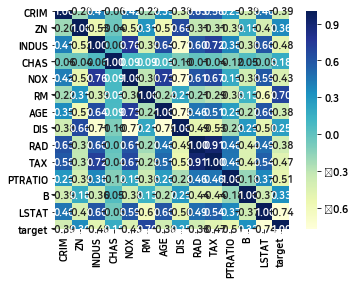

In [165]:
sns.heatmap(dd.values,
            cbar = True,
           annot=True, 
            cmap="YlGnBu",
            square=True, 
            fmt = '.2f',
            xticklabels=cols,
            yticklabels=cols
           )

In [166]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

In [167]:
X_train, X_test, y_train, y_test = train_test_split(
df.iloc[:, :-1], df['target'], test_size=0.2, random_state=42)

In [168]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [169]:
lr=LinearRegression().fit(X_train, y_train)

In [170]:
predict_y = lr.predict(X_test)
predict_y[:3]

array([28.99672362, 36.02556534, 14.81694405])

In [171]:
## 회귀의 정확도를ㄹ 나타내는 지표는  MAE, MSE, RMSE, R2-score
# 분류의 accuracy와 유사한것은 R2score
r2_score(y_test,predict_y)

0.6687594935356294

In [172]:
mse= mean_squared_error(y_test,predict_y)##test 데이터의 mse
mse

24.29111947497371

In [173]:
y_predict2=lr.predict(X_train)
r2_score(y_train, y_predict2)

0.7508856358979673

In [174]:
mse2 = mean_squared_error(y_train,y_predict2)
mse2

21.641412753226312

In [175]:
rmse1=np.sqrt(mse)
rmse2=np.sqrt(mse2)
print('train>>', rmse2, "test>>", rmse1)

train>> 4.6520331848801675 test>> 4.928602182665355


In [176]:
lr.coef_

array([-1.13055924e-01,  3.01104641e-02,  4.03807204e-02,  2.78443820e+00,
       -1.72026334e+01,  4.43883520e+00, -6.29636221e-03, -1.44786537e+00,
        2.62429736e-01, -1.06467863e-02, -9.15456240e-01,  1.23513347e-02,
       -5.08571424e-01])

In [177]:
lr.intercept_

30.24675099392408

In [178]:
df[['INDUS','CHAS','RM', 'AGE','PTRATIO','LSTAT']]

,INDUS,CHAS,RM,AGE,PTRATIO,LSTAT
0,2.31,0.0,6.575,65.2,15.3,4.98
1,7.07,0.0,6.421,78.9,17.8,9.14
2,7.07,0.0,7.185,61.1,17.8,4.03
3,2.18,0.0,6.998,45.8,18.7,2.94
4,2.18,0.0,7.147,54.2,18.7,5.33
...,...,...,...,...,...,...
501,11.93,0.0,6.593,69.1,21.0,9.67
502,11.93,0.0,6.120,76.7,21.0,9.08
503,11.93,0.0,6.976,91.0,21.0,5.64
504,11.93,0.0,6.794,89.3,21.0,6.48


In [179]:
##상관관계를 고려하여 몇개의 칼럼을 선정한후 전체 컬럼을 넣었을대와 비교해 보세요.

In [180]:
X_train, X_test, y_train, y_test = train_test_split( df[['INDUS','CHAS','RM', 'AGE','PTRATIO','LSTAT']], df['target'], test_size=0.2, random_state=42)

In [181]:
lr2=LinearRegression().fit(X_train, y_train)

In [182]:

predict_y = lr2.predict(X_test)
predict_y[:3]

array([26.98408444, 33.51798934, 16.06531524])

In [183]:
r2_score(y_test,predict_y)


0.6397253220640018

In [184]:
mse= mean_squared_error(y_test,predict_y)##test 데이터의 mse
mse

26.420305109913684

In [185]:

y_predict2=lr2.predict(X_train)
r2_score(y_train, y_predict2)

0.6968655158731274

In [186]:
mse2 = mean_squared_error(y_train,y_predict2)
mse2


26.33432445524906

In [187]:
rmse3=np.sqrt(mse)
rmse4=np.sqrt(mse2)
print('train>>', rmse2, "test>>", rmse1)


train>> 4.6520331848801675 test>> 4.928602182665355


In [188]:
lr2.coef_

array([-0.03652679,  3.41805906,  4.66007951,  0.01634248, -0.83070308,
       -0.59450818])

In [189]:
lr2.intercept_

15.022570143471988

In [ ]:
## 오버 피팅 된다... train 데이터가 훨씬 정확도가 높다. 
## 칼럼을 줄일수록 정확도가 떨어진다. 

In [192]:
# 선형회귀에 규제를 가한 것.
en = ElasticNet().fit(X_train, y_train) #L1+L2
lasso = Lasso().fit(X_train, y_train) #L1
ridge = Ridge().fit(X_train, y_train) #L2

test 데이터에 predict 대해 구함. 

In [201]:
en_predict = en.predict(X_test)
lasso_predict = lasso.predict(X_test)
ridge_predict = ridge.predict(X_test)

In [202]:
r2_en = r2_score(y_test, en_predict)
r2_lasso = r2_score(y_test, lasso_predict)
r2_ridge = r2_score(y_test, ridge_predict)

In [203]:
## 각 선형회귀에 대한 규제의 오차를 구한것. 
mse_en = mean_squared_error(y_test, en_predict)
mse_lasso = mean_squared_error(y_test, lasso_predict)
mse_ridge = mean_squared_error(y_test, ridge_predict)

train 데이터에 predict 대해 구함. 

In [205]:
en_predict2 = en.predict(X_train)
lasso_predict2 = lasso.predict(X_train)
ridge_predict2 = ridge.predict(X_train)

In [206]:
r2_en2 = r2_score(y_train, en_predict2)
r2_lasso2 = r2_score(y_train, lasso_predict2)
r2_ridge2 = r2_score(y_train, ridge_predict2)

In [207]:
mse_en2 = mean_squared_error(y_train, en_predict2)
mse_lasso2 = mean_squared_error(y_train, lasso_predict2)
mse_ridge2 = mean_squared_error(y_train, ridge_predict2)

---------------------------------------------------------

In [210]:
r2_en, r2_lasso, r2_ridge #test

(0.6370286059061893, 0.6401599542244965, 0.6402798419700422)

In [211]:
r2_en2, r2_lasso2, r2_ridge2 #train

(0.6456174649241231, 0.6548850679534371, 0.6968490859758545)

선형회귀 모델에 규제를 가하자, 오버피팅이 줄어든 것을 볼 수 있다.
(test와 train 데이터간의 predict의 정확도가 거의 일치)
